# Optimization / Minimization

In [1]:
import matplotlib.pyplot as plt # For making graphs 
import numpy as np # For working with vectors and matrices

## This is an example surface (1 dimensional, but the same principles applies over any number of dimensions), we want to optimize to find the Global minima and avoid getting stuck in the local minima.

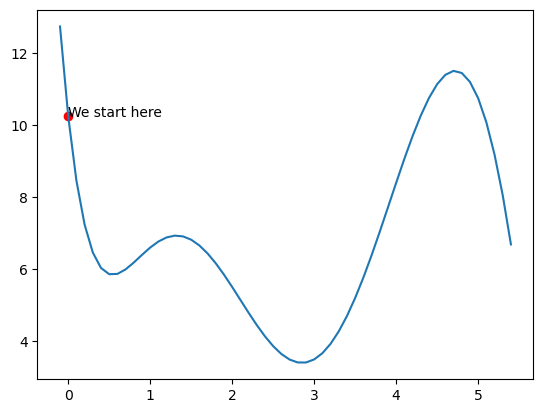

In [2]:
def f(x):
    X = [0,0.5,1,2,3,4,4.5,5]
    Y = [10,7,5,7,2,10,10,11]
    coefs = np.polyfit(X, Y, 6)
    poly = np.poly1d(coefs)
    return poly(x)

PES = np.arange(-0.1, 5.5, 0.1)

StartingPoint = 0.0
StartingY = f(StartingPoint)

plt.plot(PES, f(PES))
plt.scatter([StartingPoint], [StartingY], color="red")
plt.text(StartingPoint, StartingY, "We start here")
plt.show()


In [3]:
# We need to define some parameters of our optimizer

learning_rate = 0.01 # How big of adjustments we make on each step, too big and it'll jump all over the place, 
                    # too small and it might get trapped or run very slowly
tol           = 0.1 # What tolerance the system has, ie once the optimizers updates are only making improvements
                    # below this number call it a day


## First step is we need to determine which direct is down
### We do this by taking a test step in a one direction (there is only forwards/backwards)

In [4]:
dydx = (f(StartingPoint+learning_rate)-f(StartingPoint)) /learning_rate #Using a test step
print(dydx, "<-", "If this number is negative that means going 'right' (increasing one the x axis) on the graph is downhill")

-20.81573533511971 <- If this number is negative that means going 'right' (increasing one the x axis) on the graph is downhill


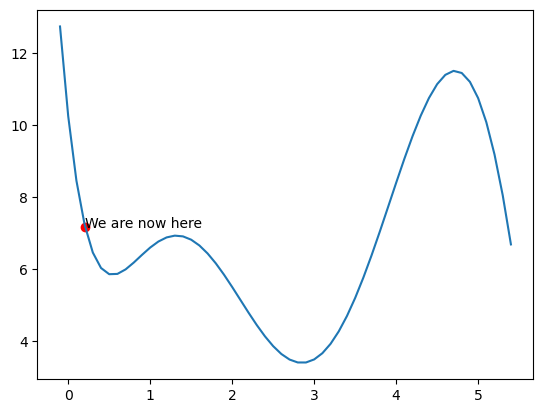

Depending on how large your learning rate is and how steep the dydx gradient was at the previous point will determine where you are in the system now


In [5]:
# So now lets allow the system to take its first step

X = StartingPoint - learning_rate*dydx

plt.plot(PES, f(PES))
plt.scatter([X], [f(X)], color="red")
plt.text(X, f(X), "We are now here")
plt.show()

print("Depending on how large your learning rate is and how steep the dydx gradient was at the previous point will determine where you are in the system now")

## Now we will run the system until the tolerance is hit (or enough iterations have passed that we just call it a day and give up)

Tolerance hit


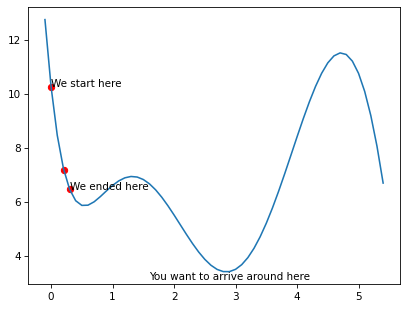

In [12]:
plt.plot(PES, f(PES))
plt.scatter([StartingPoint], [StartingY], color="red")
plt.text(StartingPoint, StartingY, "We start here")
plt.text(1.6, 3.1, "You want to arrive around here")


history = []

X = StartingPoint
for iteration in range(100): # Lets limit this to 100 iterations, incase the tolerance is never reached
    
    #print(X)
    dydx = (f(X+learning_rate)-f(X)) /learning_rate # Measure the gradient at this point
    prev_X = X # Store the old value for comparison
    X = X - learning_rate*dydx # Make a move (the direction is the sign (+/-) of dydx and the magnitude is determined by learning_rate * dydx)

    history.append(X)

    plt.scatter([X], [f(X)], color="red")

    if abs(X - prev_X) < tol:
        print("Tolerance hit")
        break
        
plt.text(X, f(X), "We ended here")
plt.gcf().set_dpi(75)
plt.show()

#### Now go back and adjust the learning rate and tolerance until you are able to get near the global minima

# Adaptive learning rates
### It can be useful to have an adaptive learning rate so that your system can adapt to the local environment of the potential surface.
### In this example we will accelerate the learning rate when its going well (learning rate * 1.2) and decelerate when thing start going badly (learning rate * 0.2)

Ieration: 0 Learning rate: 1.08 X: 3.8506291159194177 f(X): 7.381213957089663
Ieration: 1 Learning rate: 0.21600000000000003 X: 0.1453899948678945 f(X): 7.842191543855497
Ieration: 2 Learning rate: 0.25920000000000004 X: 1.822731814743105 f(X): 6.095003190325526
Ieration: 3 Learning rate: 0.31104000000000004 X: 2.704381919120851 f(X): 3.48563634153109
Tolerance hit


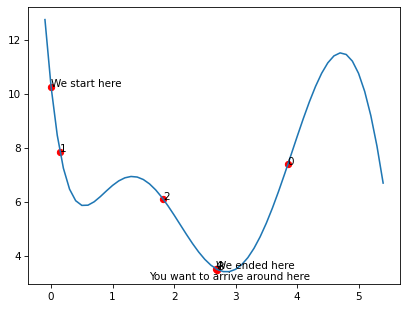

In [20]:
plt.plot(PES, f(PES))
plt.scatter([StartingPoint], [StartingY], color="red")
plt.text(StartingPoint, StartingY, "We start here")
plt.text(1.6, 3.1, "You want to arrive around here")

learning_rate = 0.9
history = []

X = StartingPoint
for iteration in range(100): # Lets limit this to 100 iterations, incase the tolerance is never reached
    
    #print(X)
    dydx = (f(X+learning_rate)-f(X)) /learning_rate # Measure the gradient at this point
    prev_X = X # Store the old value for comparison
    X = X - learning_rate*dydx # Make a move (the direction is the sign (+/-) of dydx and the magnitude is determined by learning_rate * dydx)

    history.append(X)

    plt.scatter([X], [f(X)], color="red")
    plt.text(X, f(X), str(iteration))

    if abs(X - prev_X) < tol:
        print("Tolerance hit")
        break
        
    # Accelerate / Decelerate 
    if f(X) < f(prev_X): # Test if we are lower (in the Y axis f(X) than we were previously)
        learning_rate = 1.2*learning_rate
    else:
        learning_rate = 0.2*learning_rate
    print("Ieration:", iteration, "Learning rate:", learning_rate, "X:", X, "f(X):", f(X))
        
        
plt.text(X, f(X), "We ended here")
plt.gcf().set_dpi(75)
plt.show()